# Scatterplots of active region statistics: Cycle 23

### Preamble

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools
import pandas as pd
%matplotlib inline 

# Font Size

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size'   : 17}

plt.rc('font', **font)


A = np.fromfile('axcollect_correct.dat',dtype=np.float32)
A = A.reshape(951,164)

N = np.fromfile('npole_correct.dat',dtype=np.float32)
N = N.reshape(951,164)

S = np.fromfile('spole_correct.dat',dtype=np.float32)
S = S.reshape(951,164)

axdipole2 = np.fromfile('axdipole2.dat',dtype=np.float32)

start = []
start_npole = []
start_spole = []
begin = []
begin_npole = []
begin_spole = []

for i in range(951):
    index = np.nonzero(A[i,:])
    start.append(index[0][0])
    begin.append(A[i,start[i]])
    index_npole = np.nonzero(A[i,:]);
    start_npole.append(index_npole[0][0]);
    begin_npole.append(N[i,start_npole[i]]);
    index_spole = np.nonzero(S[i,:]);
    start_spole.append(index_spole[0][0]);
    begin_spole.append(S[i,start_spole[i]]);
    
start = np.asarray(start)
start_npole = np.asarray(start_npole)
start_spole = np.asarray(start_spole)
begin = np.asarray(begin)
begin_npole = np.asarray(begin_npole)
begin_spole = np.asarray(begin_spole)

begin_rel = begin/(axdipole2[163]-axdipole2[0])
final = A[:,163]
final_rel = final/(axdipole2[163]-axdipole2[0])
final_npole = N[:,163]
final_spole = S[:,163]

total = []
total_npole = []
total_spole = []
for i in range(164):
    total.append(sum(A[:,i]))
    total_npole.append(sum(N[:,i]))
    total_spole.append(sum(S[:,i]))

thresh = 2.4e-2;
strong = np.asarray(np.where(abs(final)>thresh))
weak = np.asarray(np.where(abs(final)<thresh))
reg_percent = strong.size/951*100;
#print(reg_percent)

thresh_npole = 2.4e-2;
strong_npole = np.asarray(np.where(abs(final_npole)>thresh_npole))
weak_npole = np.asarray(np.where(abs(final_npole)<thresh_npole))
reg_percent_npole = strong_npole.size/951*100;
#print(reg_percent_npole)

thresh_spole = 2.4e-2;
strong_spole = np.asarray(np.where(abs(final_spole)>thresh_spole))
weak_spole = np.asarray(np.where(abs(final_spole)<thresh_spole))
reg_percent_spole = strong_spole.size/951*100;
#print(reg_percent_spole)

initflux = np.fromfile('initflux_collect.dat',dtype=np.float32)
initflux2 = np.fromfile('initflux2_collect.dat',dtype=np.float32)
reg_lat = np.fromfile('reg_lat_collect.dat',dtype=np.float32)
angle = np.fromfile('angle_collect.dat',dtype=np.float32)

a = [(initflux),(initflux2),(reg_lat),(start),(final_rel),(angle),(begin),(begin_rel),(final)]
a = np.asarray(a)
a = np.transpose(a)
b = sorted(a, key=lambda column: np.abs(column[4]))
b = np.transpose(b)

c = sorted(a, key=lambda column: np.abs(column[1]))
c = np.transpose(c)

d = sorted(a, key=lambda column: np.abs(column[2]))
d = np.transpose(d)

### Plots

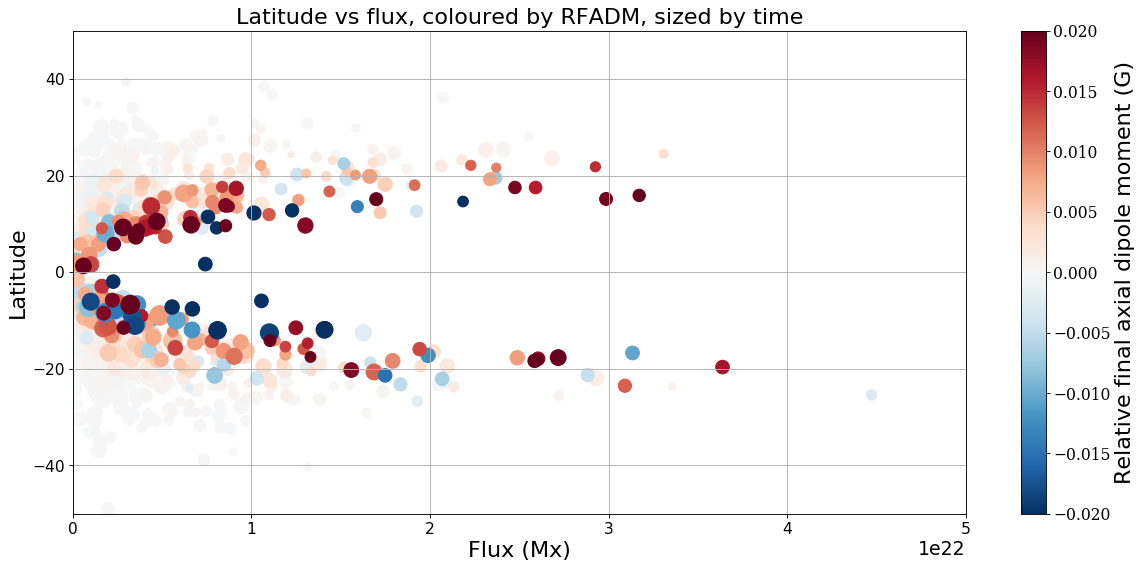

In [3]:
fig1 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(abs(b[1]),b[2],2*b[3],b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(0,5e22)
plot = fig1.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Flux (Mx)',fontsize=20)
plt.title('Latitude vs flux, coloured by RFADM, sized by time',fontsize=20)
plt.grid()
plt.show()

#### Conclusions: At low latitudes there are mainly regions with small flux. Large axial dipole moment contributions come from regions below 20 degrees.

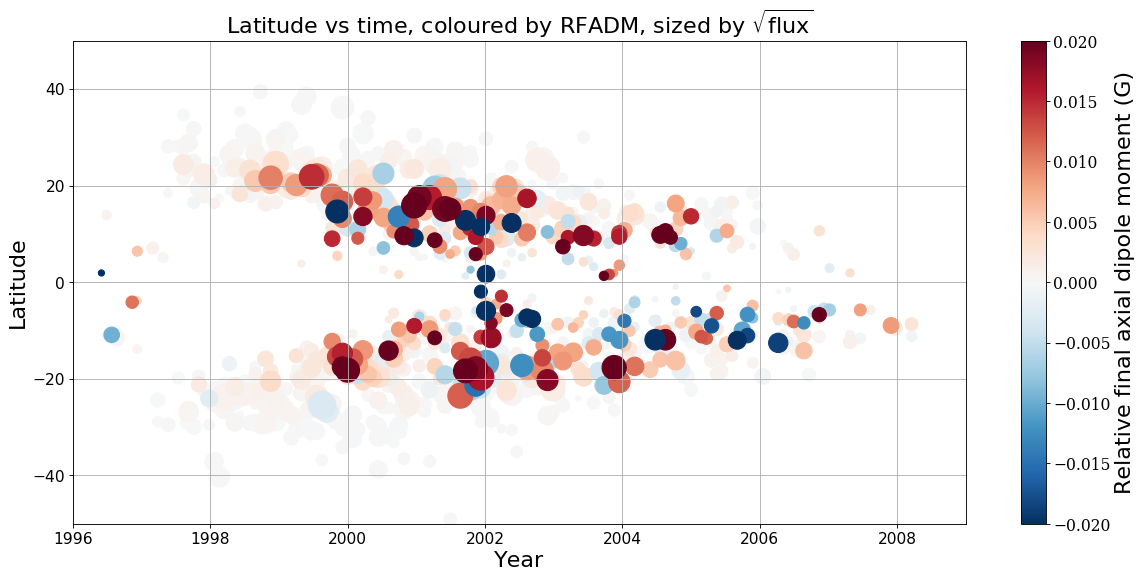

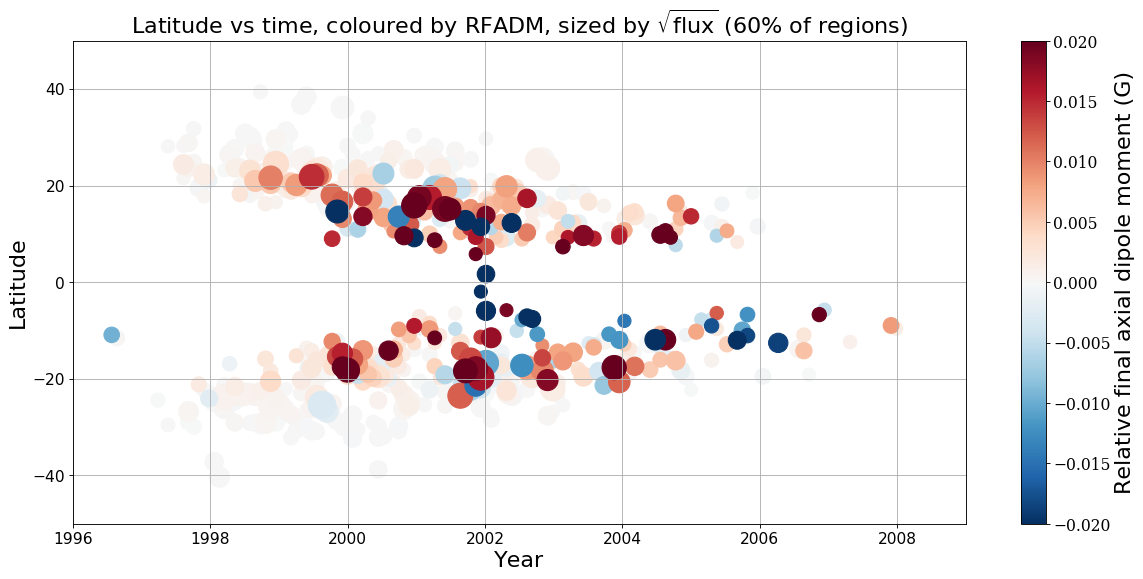

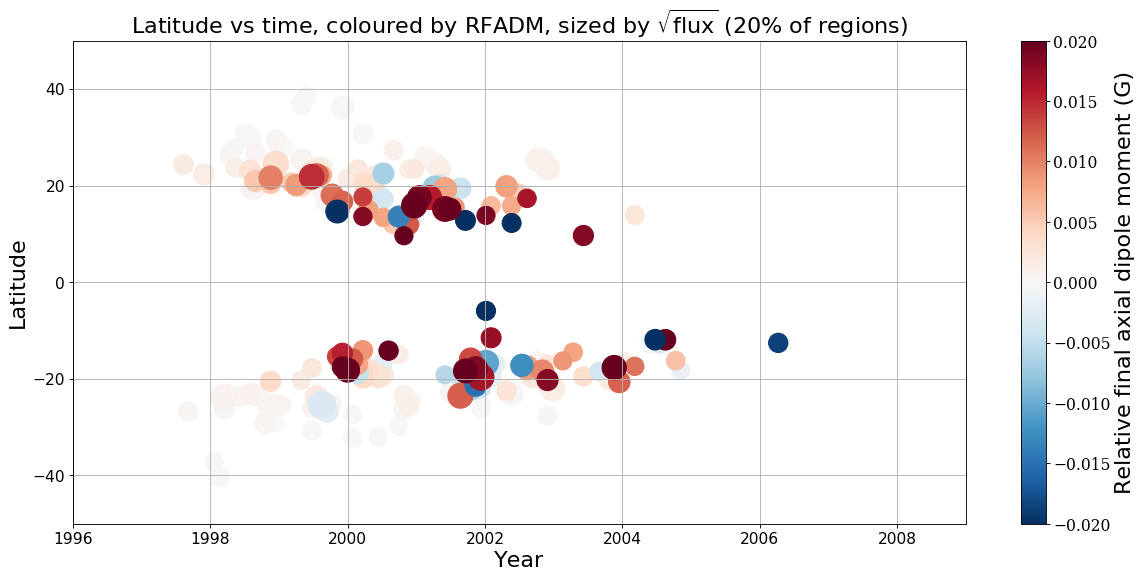

In [4]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3]*27.27+152)/365.25+1996,b[2],200*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$',fontsize=20)
plt.grid()
plt.show()

        
thresh_flux = 2.12e21;
strong_flux = np.asarray(np.where(abs(b[1])>thresh_flux))
weak_flux = np.asarray(np.where(abs(b[1])<thresh_flux))
reg_percent_flux = strong_flux.size/951*100;
#print(reg_percent_flux)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong_flux]*27.27+152)/365.25+1996,b[2][strong_flux],200*np.sqrt(abs(b[0][strong_flux])),b[4][strong_flux],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (60% of regions)',fontsize=20)
plt.grid()
plt.show()


thresh_flux = 8.12e21;
strong_flux = np.asarray(np.where(abs(b[1])>thresh_flux))
weak_flux = np.asarray(np.where(abs(b[1])<thresh_flux))
reg_percent_flux = strong_flux.size/951*100;
#print(reg_percent_flux)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong_flux]*27.27+152)/365.25+1996,b[2][strong_flux],200*np.sqrt(abs(b[0][strong_flux])),b[4][strong_flux],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (20% of regions)',fontsize=20)
plt.grid()
plt.show()

#### Cut-off levels are in terms of flux.

#### Conclusions: Some regions which 'take away' axial dipole moment emerge near the Equator. However, on using top 20% of regions ordered by flux as a threshold, some of these important regions are not included.

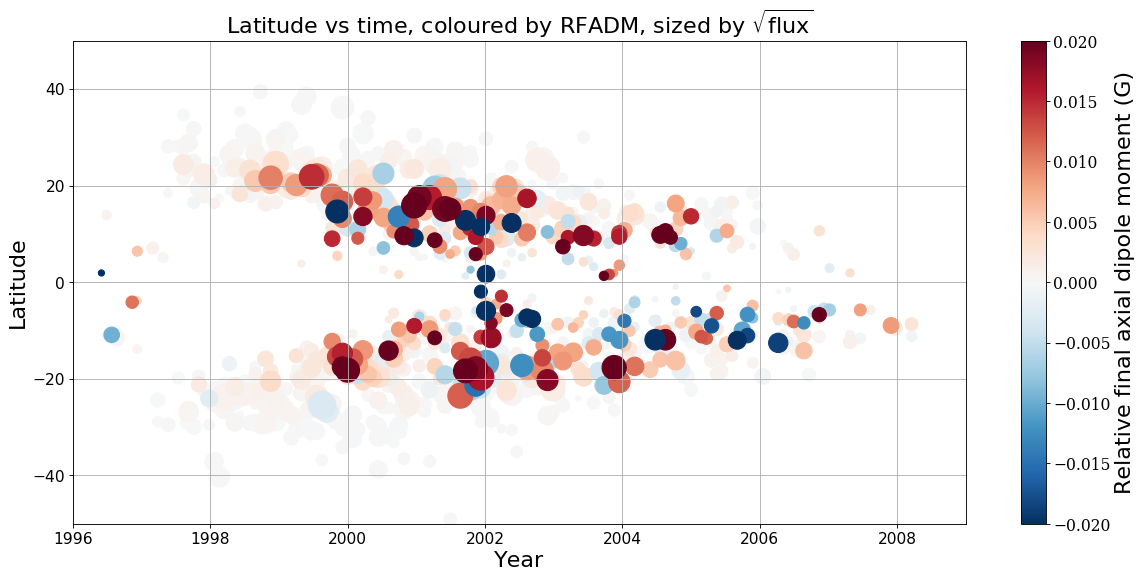

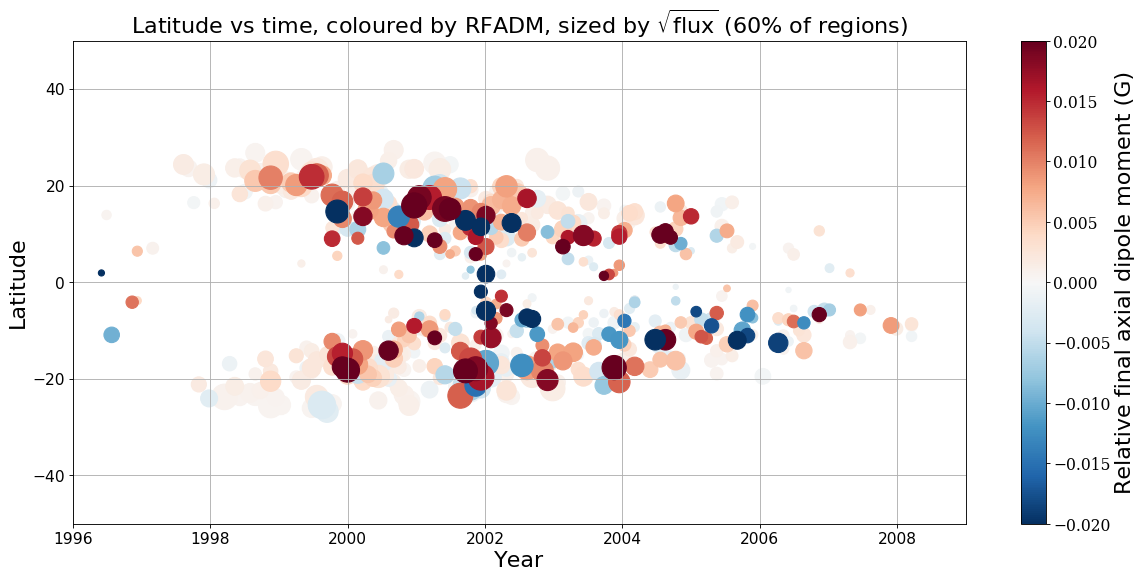

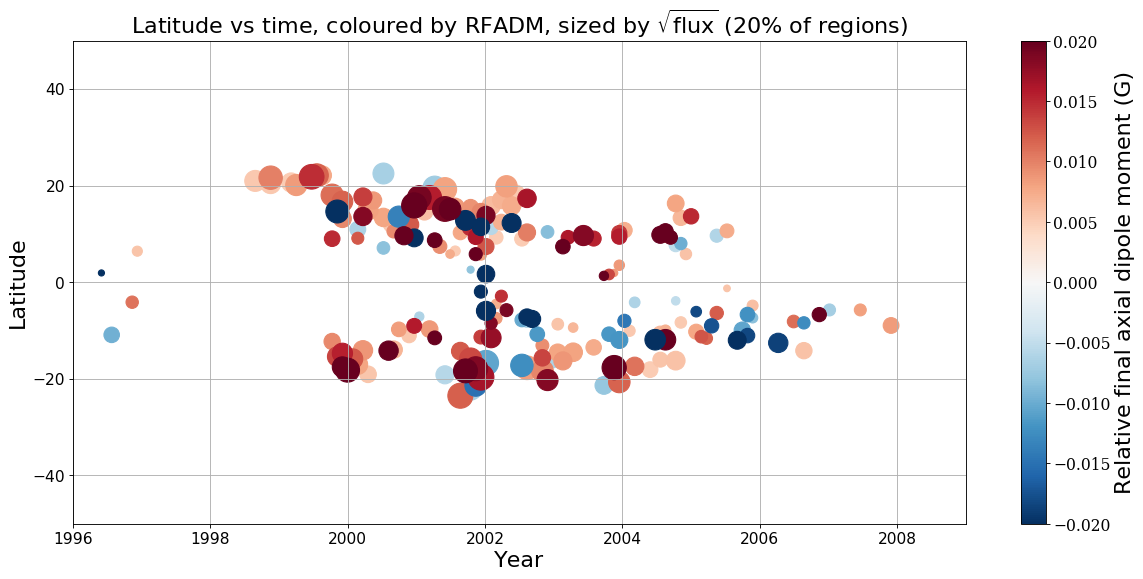

In [36]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3]*27.27+152)/365.25+1996,b[2],200*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$',fontsize=20)
plt.grid()
plt.show()

        
thresh_rel = 0.00052;
strong_rel = np.asarray(np.where(abs(b[4])>thresh_rel))
weak_rel = np.asarray(np.where(abs(b[4])<thresh_rel))
reg_percent_rel = strong_rel.size/951*100;
#print(reg_percent_rel)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong_rel]*27.27+152)/365.25+1996,b[2][strong_rel],200*np.sqrt(abs(b[0][strong_rel])),b[4][strong_rel],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (60% of regions)',fontsize=20)
plt.grid()
plt.show()



thresh_rel = 0.005;
strong_rel = np.asarray(np.where(abs(b[4])>thresh_rel))
weak_rel = np.asarray(np.where(abs(b[4])<thresh_rel))
reg_percent_rel = strong_rel.size/951*100;
#print(reg_percent_rel)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong_rel]*27.27+152)/365.25+1996,b[2][strong_rel],200*np.sqrt(abs(b[0][strong_rel])),b[4][strong_rel],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (20% of regions)',fontsize=20)
plt.grid()
plt.show()

#### Cut-off levels are in terms of relative axial dipole moment.

#### Conclusions: Using relative axial dipole moment as a threshold keeps hold of the important regions near the Equator and preserves the sideways 'H' shape.

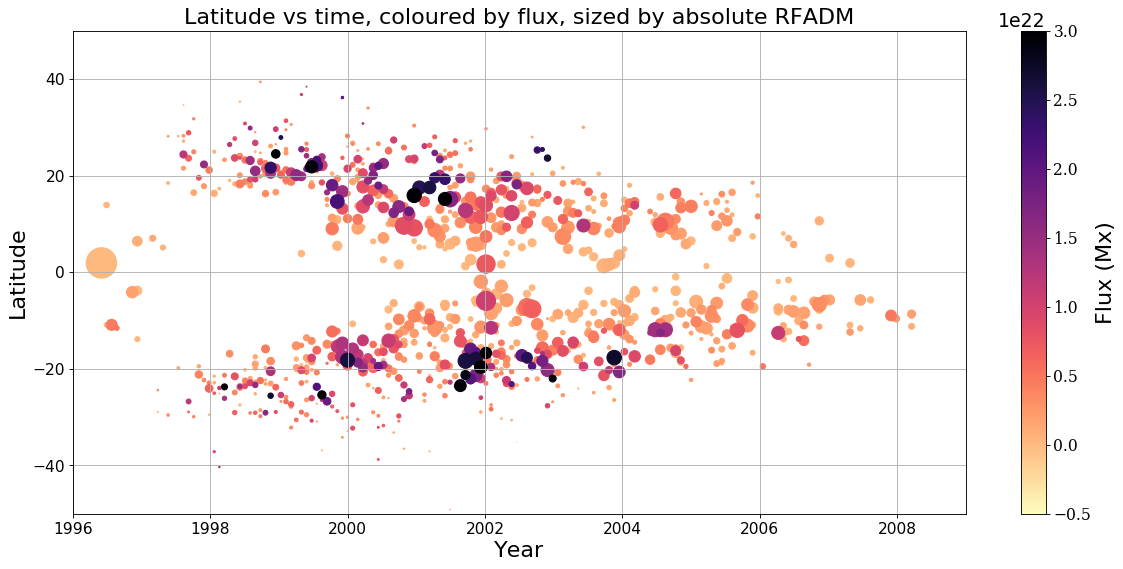

In [6]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((c[3]*27.27+152)/365.25+1996,c[2],1000*np.sqrt(abs(c[4])),abs(c[1]),cmap='magma_r',vmin=-5e21,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by flux, sized by absolute RFADM',fontsize=20)
plt.grid()
plt.show()

#### Conclusions: Regions with large flux only emerge at mid-latitudes, and mostly around cycle maximum (none after t=100).

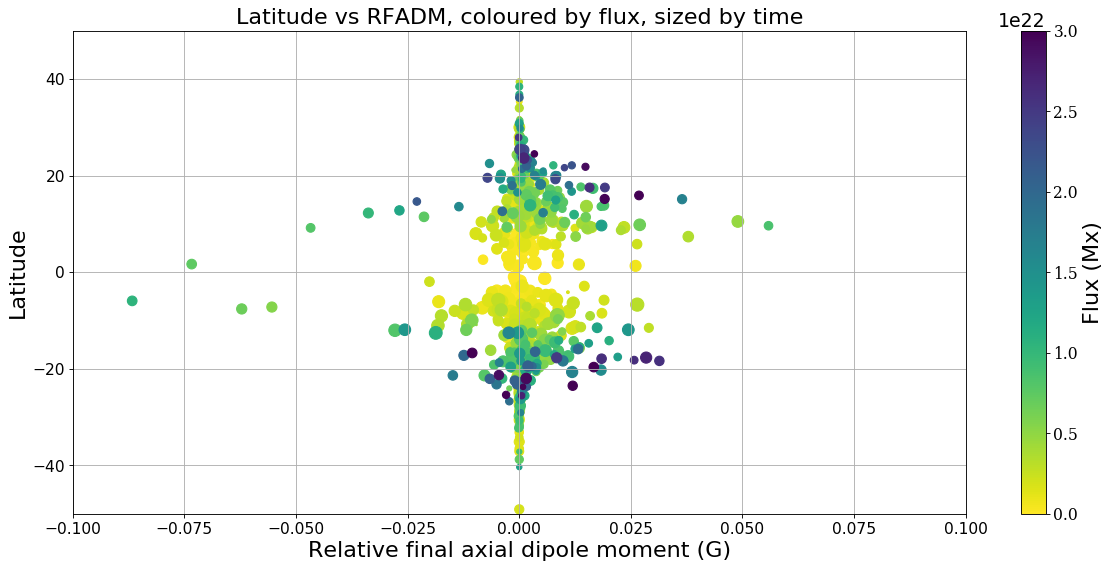

In [7]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(c[4],c[2],c[3],abs(c[1]),cmap='viridis_r',vmin=0,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('Latitude vs RFADM, coloured by flux, sized by time',fontsize=20)
plt.grid()
plt.show()

#### Conclusions: Regions at high latitudes do not contribute much to ADM (unless flux is very large). Biggest contributors are medium-strength regions at low latitudes

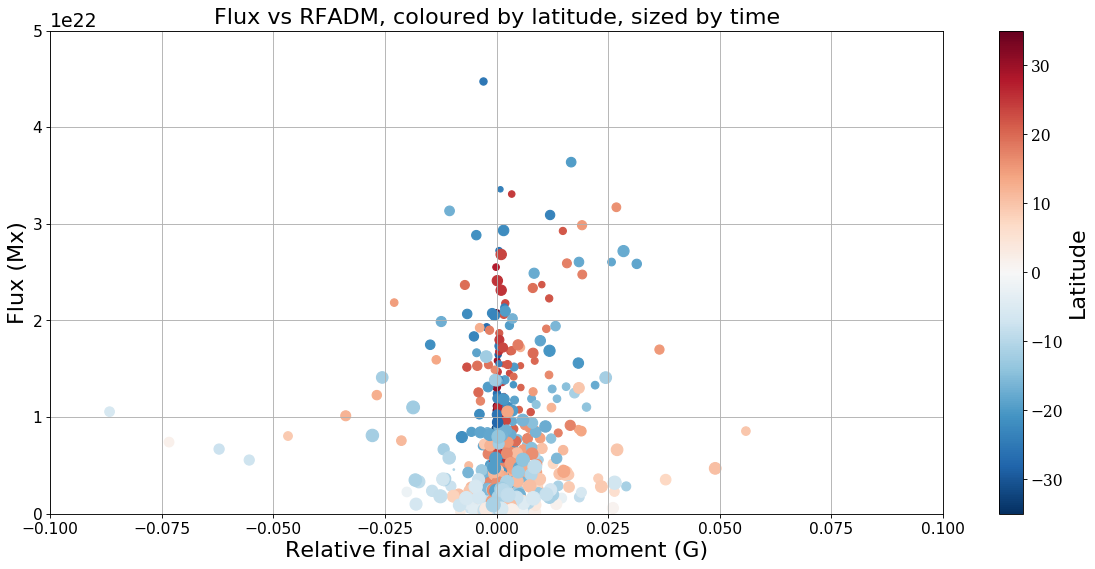

In [8]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(final_rel[1:950],abs(initflux2[1:950]),start[1:950],reg_lat[1:950],cmap='RdBu_r',vmin=-35,vmax=35)
cb_label = 'Latitude'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(0,5e22)
plt.xlim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Flux (Mx)',fontsize=20)
plt.xlabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('Flux vs RFADM, coloured by latitude, sized by time',fontsize=20)
plt.grid()
plt.show()

#### Conclusions: Flux and ADM are not strongly correlated. Latitude is more important for final ADM.

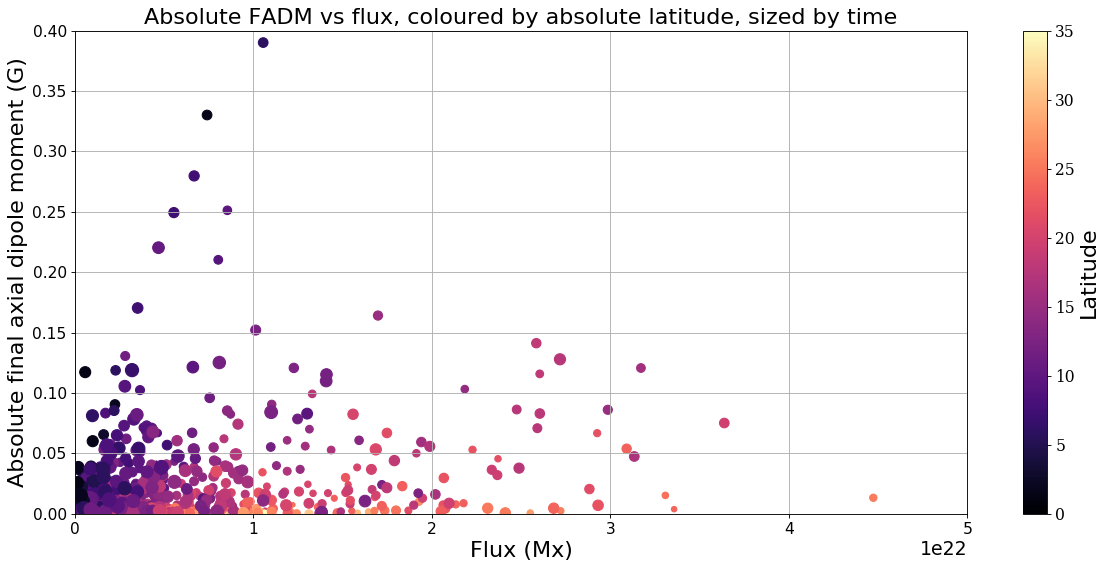

In [9]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(abs(initflux2[1:950]),abs(final[1:950]),start[1:950],abs(reg_lat[1:950]),cmap='magma',vmin=0,vmax=35)
cb_label = 'Latitude'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.xlim(0,5e22)
plt.ylim(0,0.4)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Flux (Mx)',fontsize=20)
plt.ylabel('Absolute final axial dipole moment (G)',fontsize=20)
plt.title('Absolute FADM vs flux, coloured by absolute latitude, sized by time',fontsize=20)
plt.grid()
plt.show()

#### Conclusions: Same as above. Regions from different latitudes produce different gradients. 

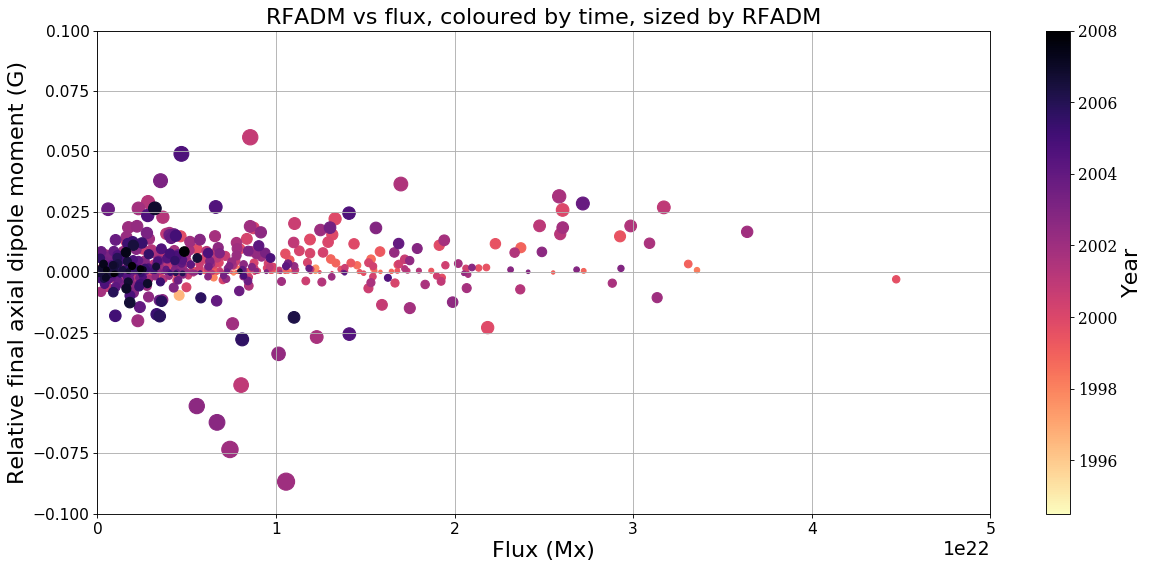

In [10]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(abs(initflux2[1:950]),final_rel[1:950],800*np.sqrt(abs(final_rel[1:950])),(start[1:950]*27.27+152)/365.25+1996,cmap='magma_r',vmin=1994.5,vmax=2008)
cb_label = 'Year'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.xlim(0,5e22)
plt.ylim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Flux (Mx)',fontsize=20)
plt.ylabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('RFADM vs flux, coloured by time, sized by RFADM',fontsize=20)
plt.grid()
plt.show()

#### Conclusions: See side-by-side plot.

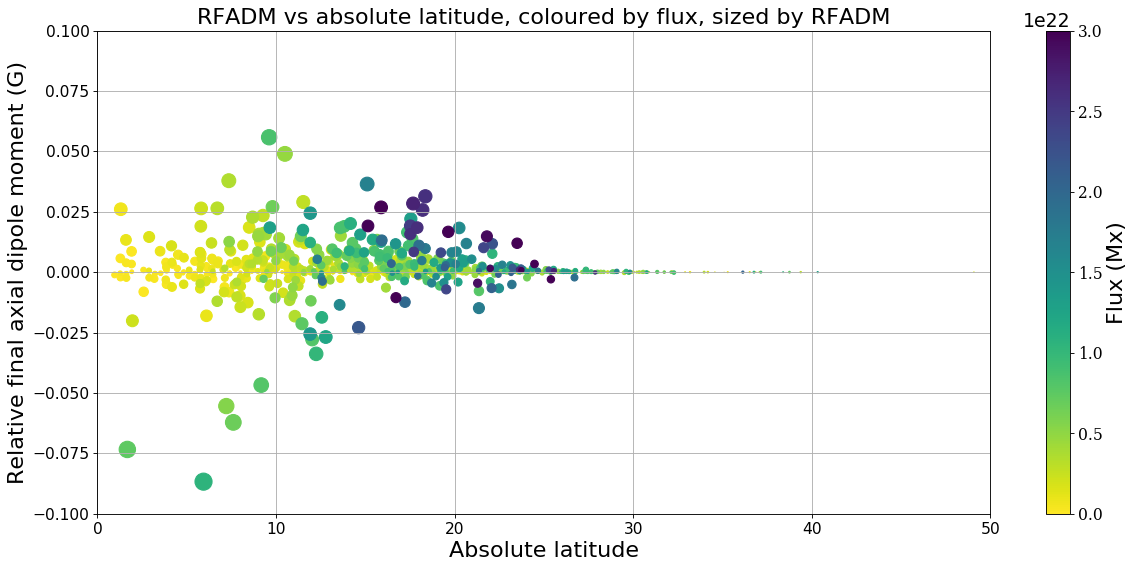

In [11]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(abs(c[2]),c[4],800*np.sqrt(abs(c[4])),abs(c[1]),cmap='viridis_r',vmin=0,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.xlim(0,50)
plt.ylim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Absolute latitude',fontsize=20)
plt.ylabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('RFADM vs absolute latitude, coloured by flux, sized by RFADM',fontsize=20)
plt.grid()
plt.show()

#### Conclusions: See side-by-side plot.

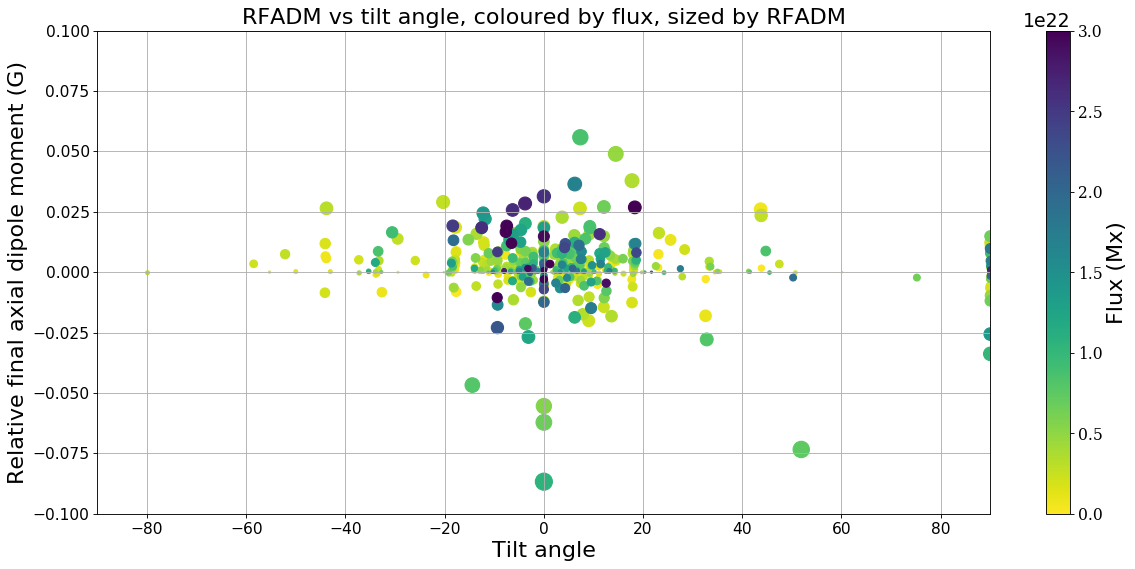

In [12]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(c[5],c[4],800*np.sqrt(abs(c[4])),abs(c[1]),cmap='viridis_r',vmin=0,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.xlim(-90,90)
plt.ylim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Tilt angle',fontsize=20)
plt.ylabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('RFADM vs tilt angle, coloured by flux, sized by RFADM',fontsize=20)
plt.grid()
plt.show()

#### Conclusions: Not sure what to conclude - tilt angle measurements suspect/not meaningful for multipolar regions. Try initial axial dipole moment instead.

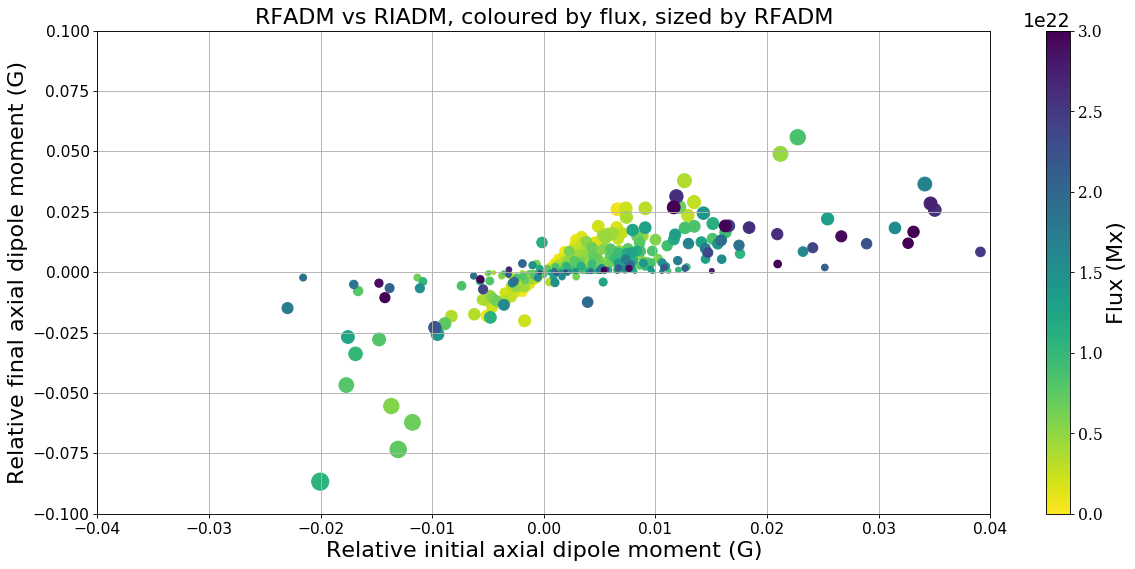

In [13]:
fig3 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(c[7],c[4],800*np.sqrt(abs(c[4])),abs(c[1]),cmap='viridis_r',vmin=0,vmax=3e22)
cb_label = 'Flux (Mx)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.xlim(-0.04,0.04)
plt.ylim(-0.1,0.1)
plot = fig3.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Relative initial axial dipole moment (G)',fontsize=20)
plt.ylabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('RFADM vs RIADM, coloured by flux, sized by RFADM',fontsize=20)
plt.grid()
plt.show()

#### Conclusions: Flux affects initial ADM more than final ADM. There exists a correlation between initial and final ADM.

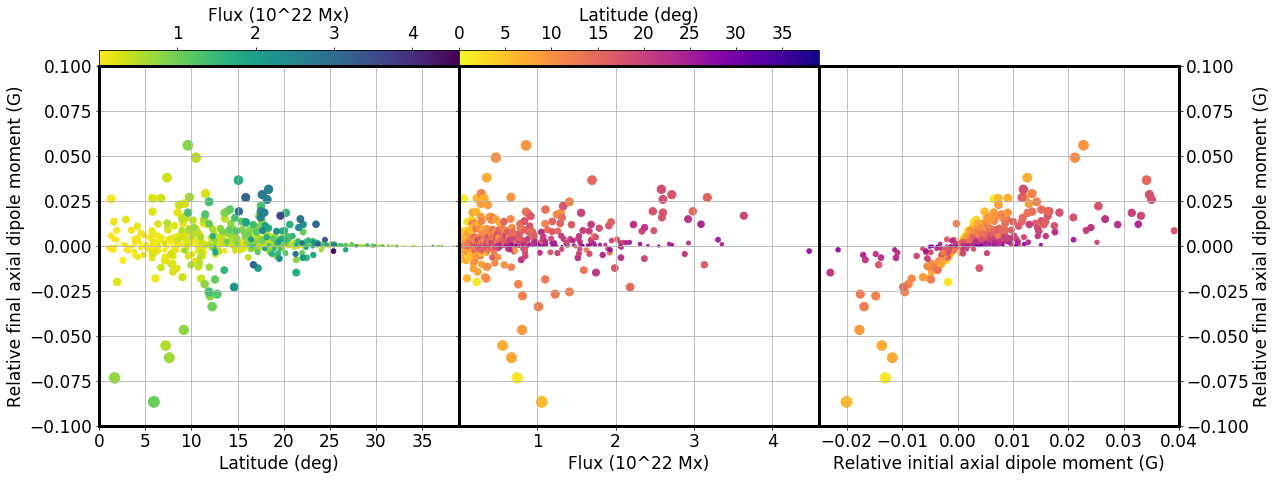

In [14]:
dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1500    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))

# Latitude Limits
lat1 = 0
lat2 = 39

latticks = np.arange(lat1,lat2,5)

# Flux Limits
fl1 = 0
fl2 = 4.6

fluxticks = np.arange(1,fl2,1)

#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])
cbaxes2 = fig.add_axes([ppadh+pxx/fszh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Latitude vs. Final Dipole
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = ax1.scatter(abs(c[2]),c[4],szf*np.sqrt(abs(c[4])),abs(c[1])/1e22,cmap='viridis_r',vmin=fl1,vmax=fl2)
ax1.set_xlabel('Latitude (deg)')
ax1.set_xlim(lat1,lat2)
#ax1.set_title('Coloured by flux, sized by RFADM')
ax1.set_ylabel('Relative final axial dipole moment (G)')
ax1.grid()
ax1.set_xticks(latticks)

# Flux vs. Final Dipole
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
ax2.scatter(abs(c[1])/1e22,c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax2.set_xlabel('Flux (10^22 Mx)')
ax2.set_xlim(fl1,fl2)
ax2.set_ylim(-0.1,0.1)

#ax2.set_title('Coloured by time, sized by RFADM')
ax2.grid()
ax2.tick_params(labelleft='off') 
ax2.set_xticks(fluxticks)

# Initial Dipole vs. Final Dipole
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)

im3 = ax3.scatter(c[7],c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax3.set_xlabel('Relative initial axial dipole moment (G)')
#ax3.set_title('Coloured by flux, sized by RFADM')
ax3.set_xlim(-0.025,0.04)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Relative final axial dipole moment (G)')

# Setting Vertical Axis
ax1.set_ylim(-0.1,0.1)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('Flux (10^22 Mx)')
cb1.set_ticks(ax2.get_xticks())
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')


# Adding Latitude Colorbar

cb2 = fig.colorbar(im3,cax=cbaxes2, orientation='horizontal')
cb2.set_label('Latitude (deg)')
cb2.set_ticks(latticks)
cbaxes2.xaxis.tick_top()
cbaxes2.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3) 

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3) 

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3) 


#### Conclusions: The biggest contributor to the ADM emerges at low latitude with a moderate amount of flux. Biggest contributors emerge below 20 degrees.

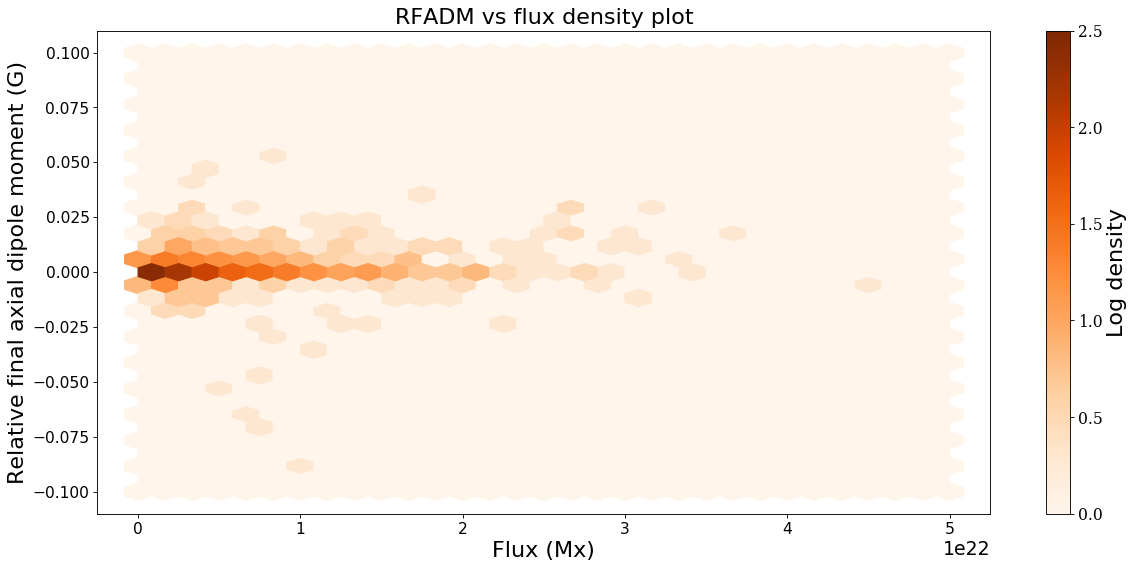

In [15]:
fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.hexbin(abs(initflux2[1:950]),final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[0, 5e22, -0.1, 0.1])
cb_label = 'Log density'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Flux (Mx)',fontsize=20)
plt.ylabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('RFADM vs flux density plot',fontsize=20)
plt.show()

#### Conclusions: See side-by-side plot.

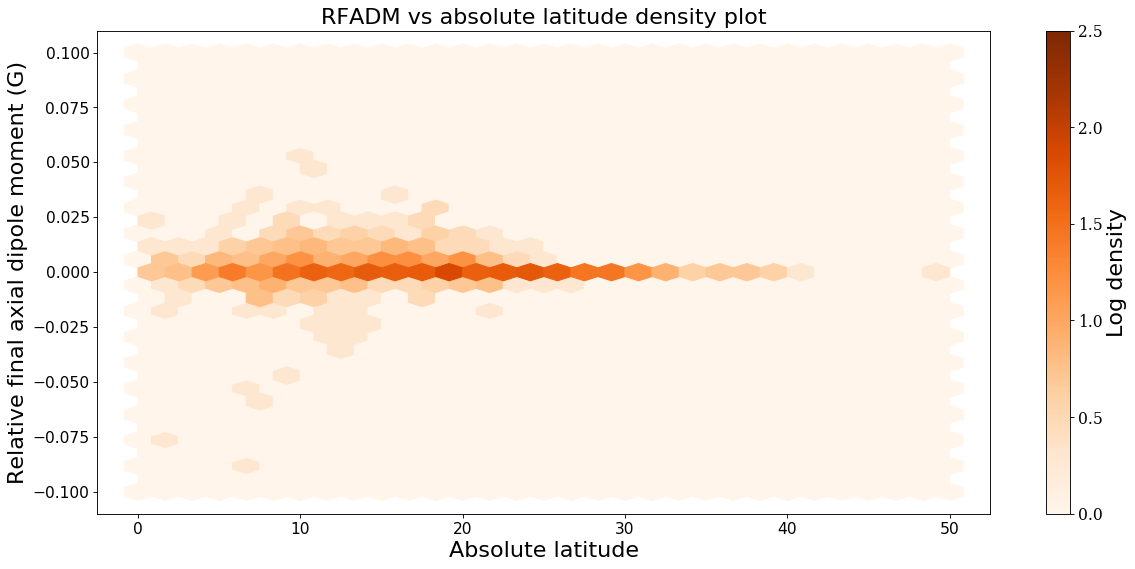

In [16]:
fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.hexbin(abs(reg_lat[1:950]),final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[-0, 50, -0.1, 0.1])
cb_label = 'Log density'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Absolute latitude',fontsize=20)
plt.ylabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('RFADM vs absolute latitude density plot',fontsize=20)
plt.show()

#### Conclusions: See side-by-side plot.

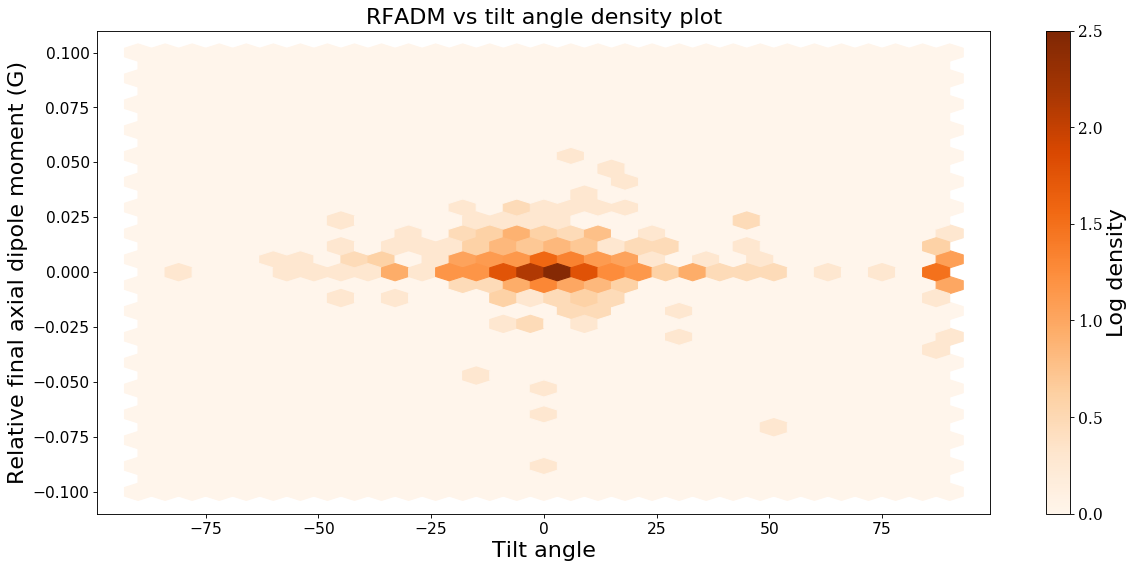

In [17]:
fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.hexbin(angle[1:950],final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[-90, 90, -0.1, 0.1])
cb_label = 'Log density'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Tilt angle',fontsize=20)
plt.ylabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('RFADM vs tilt angle density plot',fontsize=20)
plt.show()

#### Conclusions: Not sure what to conclude - tilt angle measurements suspect/not meaningful for multipolar regions. Try initial axial dipole moment instead.

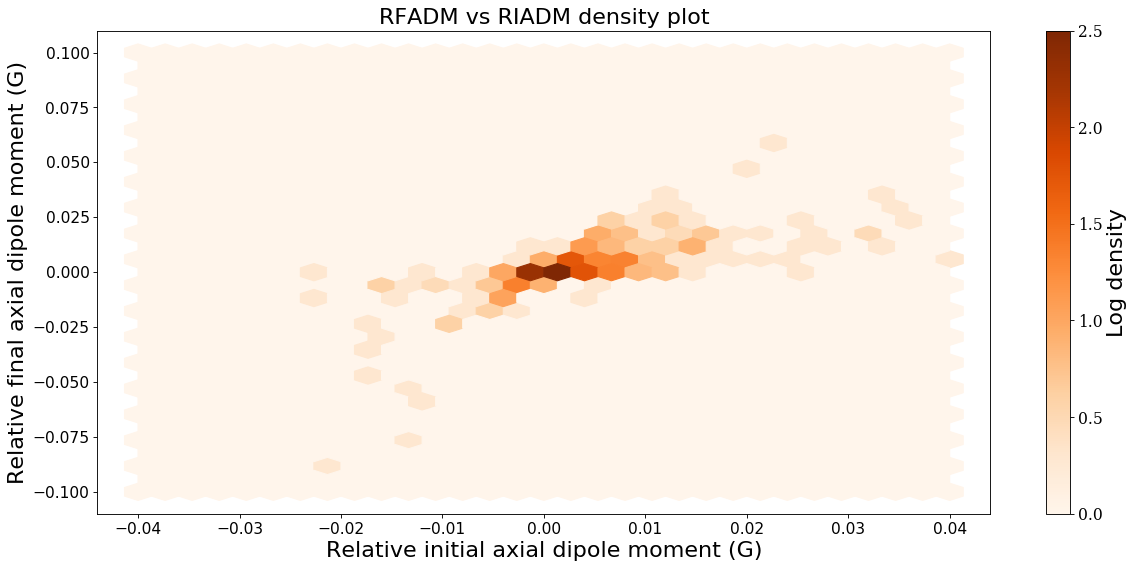

In [18]:
fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.hexbin(begin_rel[1:950],final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[-0.04, 0.04, -0.1, 0.1])
cb_label = 'Log density'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Relative initial axial dipole moment (G)',fontsize=20)
plt.ylabel('Relative final axial dipole moment (G)',fontsize=20)
plt.title('RFADM vs RIADM density plot',fontsize=20)
plt.show()

#### Conclusions: See side-by-side plot.

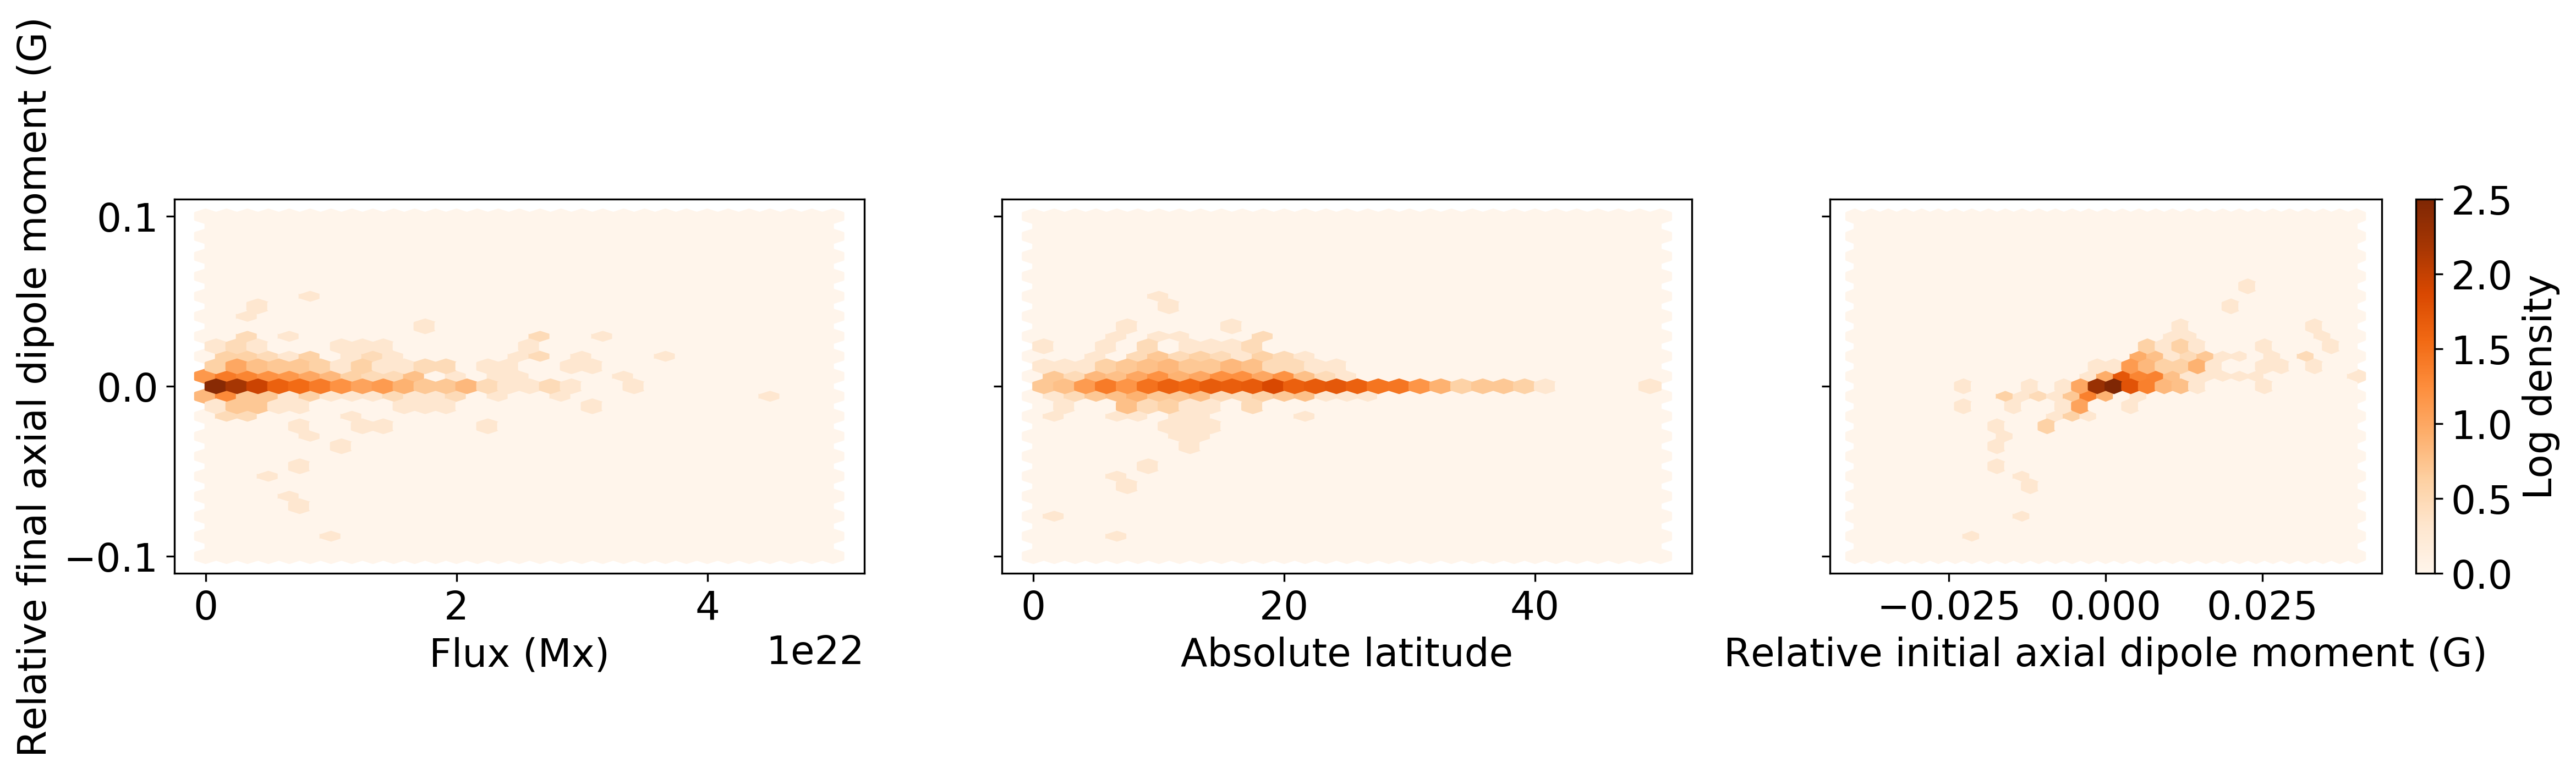

In [19]:
dpi = 300
pxx = 5500   # Horizontal size of each panel
pxy = 300    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 0 #Vertical padding in pixels
padv2 = 0  #Vertical padding in pixels between panels
padh  = 0 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )          #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units


# Two subplots, unpack the axes array immediately
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(fszh/dpi,fszv/dpi), dpi = dpi)
ax1.hexbin(abs(initflux2[1:950]),final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[0, 5e22, -0.1, 0.1])
ax1.set_xlabel('Flux (Mx)')
ax1.set_ylabel('Relative final axial dipole moment (G)')
ax2.hexbin(abs(reg_lat[1:950]),final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[0, 50, -0.1, 0.1])
ax2.set_xlabel('Absolute latitude')
im3 = ax3.hexbin(begin_rel[1:950],final_rel[1:950],gridsize=30,bins='log',cmap='Oranges',vmin=0,vmax=2.5,extent=[-0.04, 0.04, -0.1, 0.1])
ax3.set_xlabel('Relative initial axial dipole moment (G)')
cb_label = 'Log density'
cb = f.colorbar(im3,ax=ax3)
cb.set_label(cb_label)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')


plt.show()

#### Conclusions: The majority of regions contribute very little to the ADM, and have small amounts of flux. Most regions emerge between 10 and 30 degrees. There are more regions 'adding' to the ADM than 'taking away'.

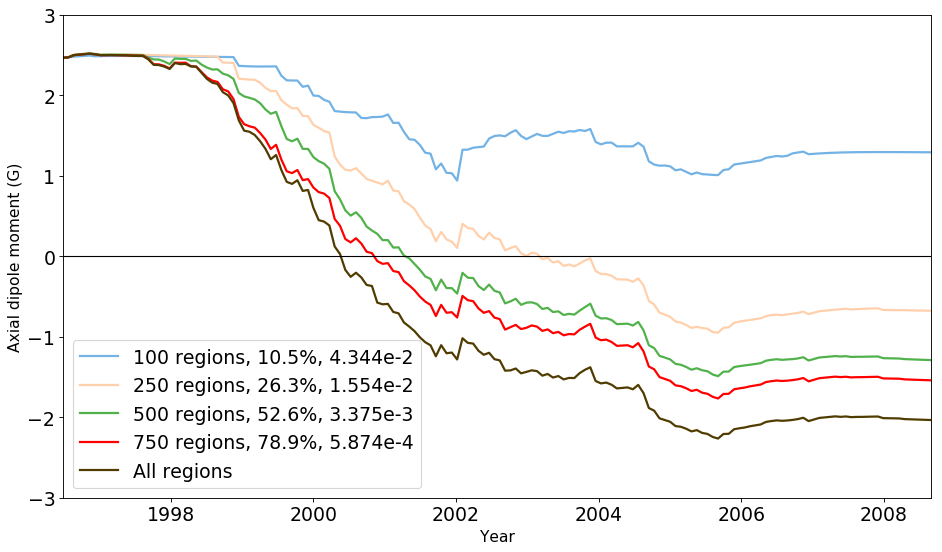

In [20]:
brown = (80/255,60/255,0)
green = (81/255,178/255,76/255)
blue = (114/255,178/255,229/255)
purple = (111/255,40/255,124/255)
peach = (1,208/255,171/255)

timeyear = (np.arange(1,165)*27.27+152)/365.25+1996

axdipole_100 = np.fromfile('axdipole_100.dat',dtype=np.float32)
axdipole_250 = np.fromfile('axdipole_250.dat',dtype=np.float32)
axdipole_500 = np.fromfile('axdipole_500.dat',dtype=np.float32)
axdipole_750 = np.fromfile('axdipole_750.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(14,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear,axdipole_100,color=blue,lw=2,label='100 regions, 10.5%, 4.344e-2')
plt.plot(timeyear,axdipole_250,color=peach,lw=2,label='250 regions, 26.3%, 1.554e-2')
plt.plot(timeyear,axdipole_500,color=green,lw=2,label='500 regions, 52.6%, 3.375e-3')
plt.plot(timeyear,axdipole_750,'red',lw=2,label='750 regions, 78.9%, 5.874e-4')
plt.plot(timeyear,axdipole2,color=brown,lw=2,label='All regions')
plt.plot((timeyear[0],timeyear[163]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear[0],timeyear[163])
plt.ylim(-3,3)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Axial dipole moment (G)',fontsize=14)
plt.legend()
plt.show()

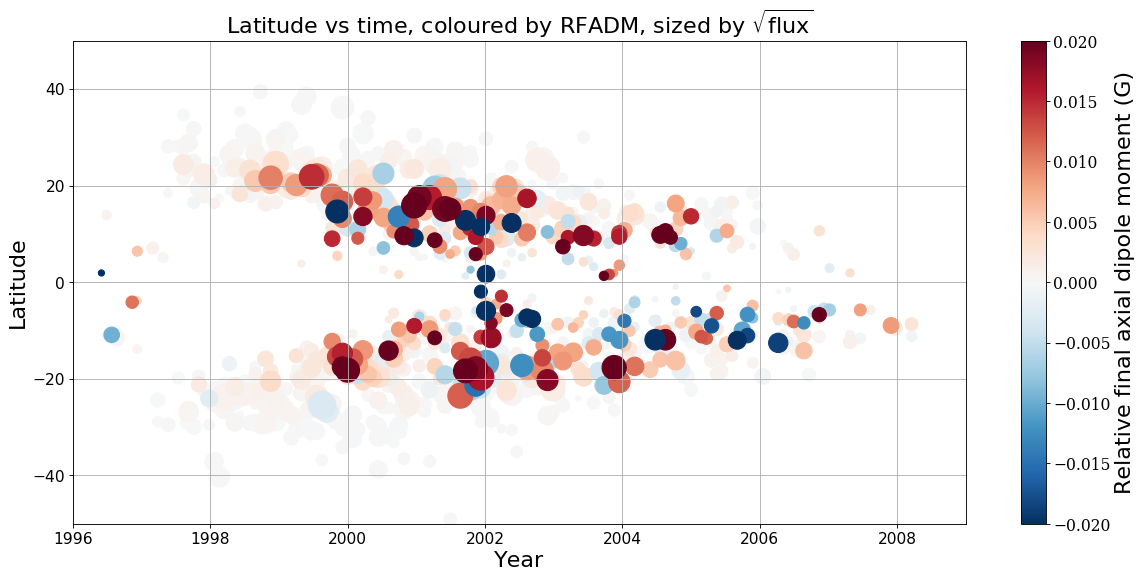

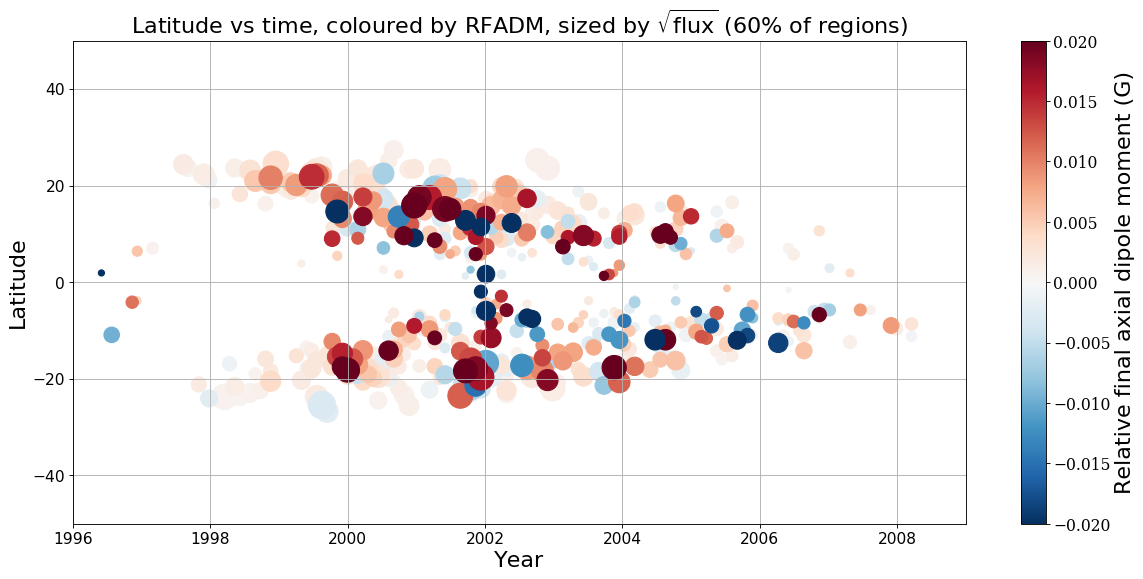

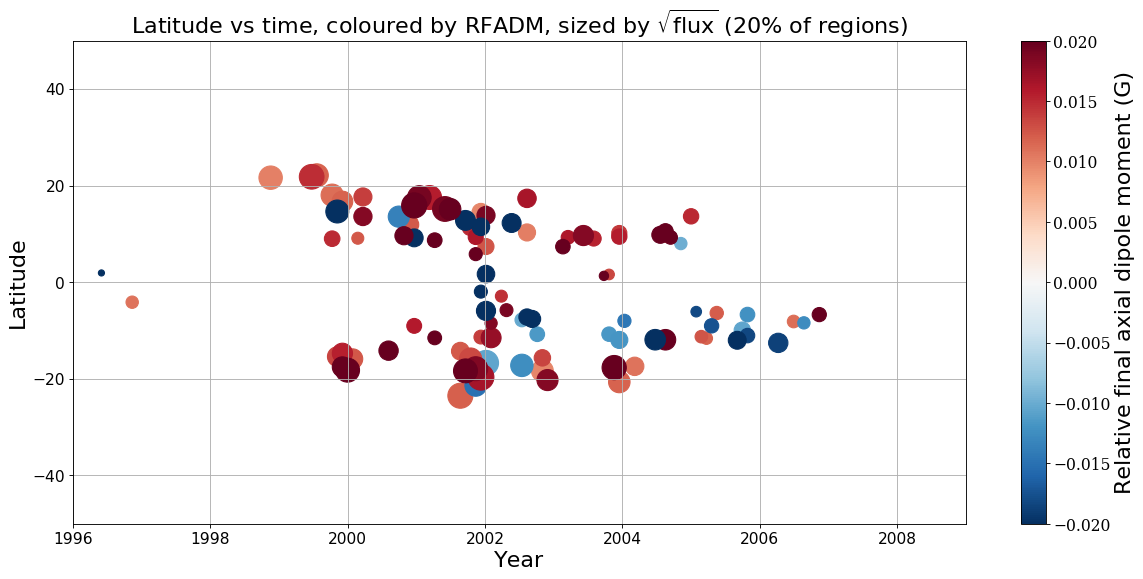

In [38]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3]*27.27+152)/365.25+1996,b[2],200*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$',fontsize=20)
plt.grid()
plt.show()

        
thresh = 3.375e-3;
strong = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong.size/951*100;
#print(reg_percent)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong]*27.27+152)/365.25+1996,b[2][strong],200*np.sqrt(abs(b[0][strong])),b[4][strong],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (60% of regions)',fontsize=20)
plt.grid()
plt.show()



thresh = 4.344e-2;
strong = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong.size/951*100;
#print(reg_percent)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong]*27.27+152)/365.25+1996,b[2][strong],200*np.sqrt(abs(b[0][strong])),b[4][strong],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(1996,2009)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (20% of regions)',fontsize=20)
plt.grid()
plt.show()

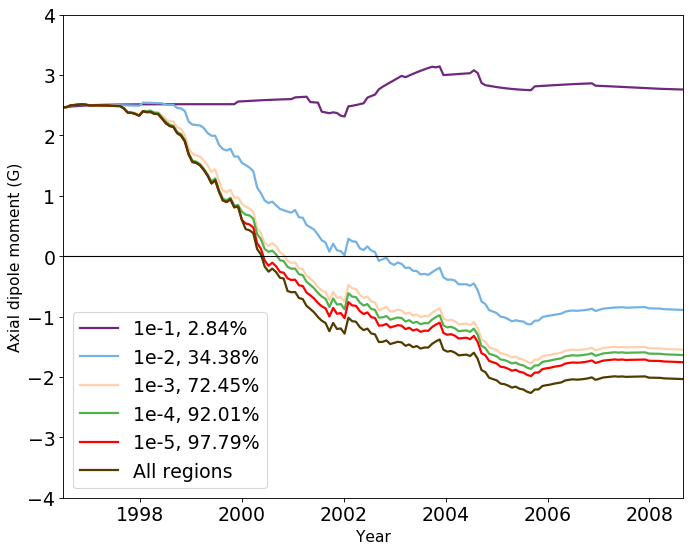

In [22]:
axdipole01 = np.fromfile('axdipole01.dat',dtype=np.float32)
axdipole001 = np.fromfile('axdipole001.dat',dtype=np.float32)
axdipole0001 = np.fromfile('axdipole0001.dat',dtype=np.float32)
axdipole00001 = np.fromfile('axdipole00001.dat',dtype=np.float32)
axdipole000001 = np.fromfile('axdipole000001.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear,axdipole01,color=purple,lw=2,label='1e-1, 2.84%')
plt.plot(timeyear,axdipole001,color=blue,lw=2,label='1e-2, 34.38%')
plt.plot(timeyear,axdipole0001,color=peach,lw=2,label='1e-3, 72.45%')
plt.plot(timeyear,axdipole00001,color=green,lw=2,label='1e-4, 92.01%')
plt.plot(timeyear,axdipole000001,'red',lw=2,label='1e-5, 97.79%')
plt.plot(timeyear,axdipole2,color=brown,lw=2,label='All regions')
plt.plot((timeyear[0], timeyear[163]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear[0],timeyear[163])
plt.ylim(-4,4)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Axial dipole moment (G)',fontsize=14)
plt.legend()
plt.show()

#### Evolution of the axial dipole moment after including the regions with final axial dipole moment contributions greater than each given threshold.

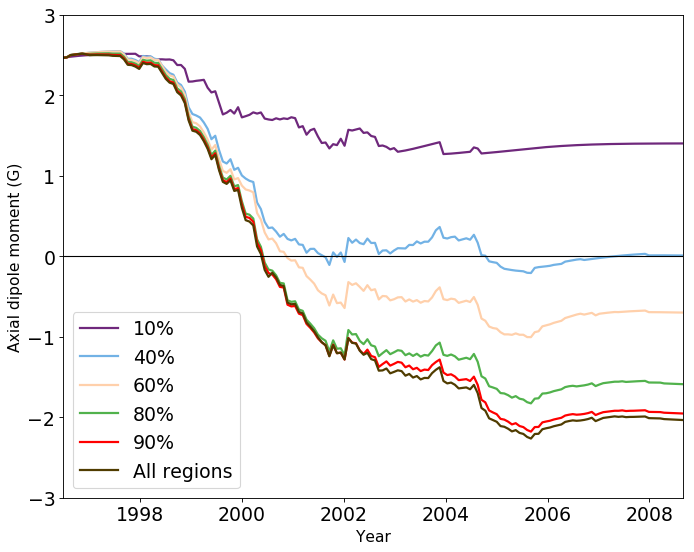

In [23]:
axdipole10 = np.fromfile('axdipole10.dat',dtype=np.float32)
axdipole40 = np.fromfile('axdipole40.dat',dtype=np.float32)
axdipole60 = np.fromfile('axdipole60.dat',dtype=np.float32)
axdipole80 = np.fromfile('axdipole80.dat',dtype=np.float32)
axdipole90 = np.fromfile('axdipole90.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear,axdipole10,color=purple,lw=2,label='10%')
plt.plot(timeyear,axdipole40,color=blue,lw=2,label='40%')
plt.plot(timeyear,axdipole60,color=peach,lw=2,label='60%')
plt.plot(timeyear,axdipole80,color=green,lw=2,label='80%')
plt.plot(timeyear,axdipole90,'red',lw=2,label='90%')
plt.plot(timeyear,axdipole2,color=brown,lw=2,label='All regions')
plt.plot((timeyear[0], timeyear[163]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear[0],timeyear[163])
plt.ylim(-3,3)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Axial dipole moment (G)',fontsize=14)
plt.legend()
plt.show()

#### Evolution of the axial dipole moment using the strongest x% of regions (by flux).

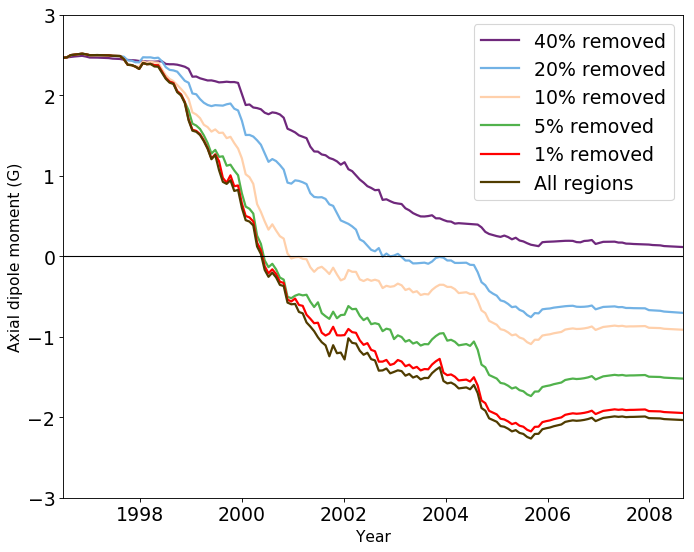

In [24]:
axdipole_40 = np.fromfile('axdipole_40.dat',dtype=np.float32)
axdipole_20 = np.fromfile('axdipole_20.dat',dtype=np.float32)
axdipole_10 = np.fromfile('axdipole_10.dat',dtype=np.float32)
axdipole_05 = np.fromfile('axdipole_05.dat',dtype=np.float32)
axdipole_01 = np.fromfile('axdipole_01.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear,axdipole_40,color=purple,lw=2,label='40% removed')
plt.plot(timeyear,axdipole_20,color=blue,lw=2,label='20% removed')
plt.plot(timeyear,axdipole_10,color=peach,lw=2,label='10% removed')
plt.plot(timeyear,axdipole_05,color=green,lw=2,label='5% removed')
plt.plot(timeyear,axdipole_01,'red',lw=2,label='1% removed')
plt.plot(timeyear,axdipole2,color=brown,lw=2,label='All regions')
plt.plot((timeyear[0],timeyear[163]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear[0],timeyear[163])
plt.ylim(-3,3)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Axial dipole moment (G)',fontsize=14)
plt.legend()
plt.show()

#### Evolution of the axial dipole moment after removing the strongest x% of regions (by flux).